In [63]:
import pandas as pd
import io
import seaborn as sns

In [64]:
# from google.colab import drive
# import os

# drive.mount('/content/drive/')


In [65]:
# Lista los archivos y carpetas en el directorio

#Además creo una carpeta que se llame Datasets, allí es donde voy a dejar el .csv
# files = os.listdir("/content/drive/MyDrive/Datasets")
# files

file_path = "parquet-datasets/dnrpa-prendas-autos-202408.parquet"

In [66]:
# file_path = '/content/drive/MyDrive/Datasets/dnrpa-robos-recuperos-autos-202201.csv'

# dtype={"registro_seccional_codigo":"str"}

# df = pd.read_csv(file_path, sep=",", dtype=str)
df = pd.read_parquet(file_path, engine='fastparquet')
df = df.astype(str)
df.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,PRENDA - INSCRIPCION,2024-08-13,1998-06-19,21001,ALCORTA,Santa Fe,Protocolo 21,1998.0,None,CAMION C/ CAJA ABIERTA VOL,...,Privado,Física,ALCORTA,SANTA FE,No identificado,1969.0,ARGENTINA,100,82,ARG
1,PRENDA - INSCRIPCION,2024-08-19,1997-10-30,21040,SAN CARLOS CENTRO,Santa Fe,Nacional,1997.0,None,BERLINA 3 PTAS,...,Privado,Física,GALVEZ,SANTA FE,Masculino,1989.0,ARGENTINA,100,82,ARG
2,PRENDA - INSCRIPCION,2024-08-05,2009-02-27,21058,ROSARIO Nº 15,Santa Fe,Nacional,2009.0,None,RURAL 5 PTAS,...,Privado,Física,ROSARIO,SANTA FE,Masculino,1985.0,ARGENTINA,100,82,ARG
3,PRENDA - INSCRIPCION,2024-08-21,1995-08-04,13005,TUNUYAN,Mendoza,Nacional,1995.0,None,TRANSPORTE DE CARGA,...,Privado,Física,EUGENIO BUSTOS-SAN CARLOS,MENDOZA,Femenino,1975.0,ARGENTINA,100,50,ARG
4,PRENDA - INSCRIPCION,2024-08-21,2000-05-26,4052,JUSTINIANO POSSE,Córdoba,Nacional,2000.0,None,CAMION TRACTOR,...,Privado,Jurídica,WENCESLAO ESCALANTE,CORDOBA,No aplica,2016.0,No aplica,100,14,None


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31137 entries, 0 to 31136
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tramite_tipo                    31137 non-null  object
 1   tramite_fecha                   31137 non-null  object
 2   fecha_inscripcion_inicial       31137 non-null  object
 3   registro_seccional_codigo       31137 non-null  object
 4   registro_seccional_descripcion  31137 non-null  object
 5   registro_seccional_provincia    31137 non-null  object
 6   automotor_origen                31137 non-null  object
 7   automotor_anio_modelo           31137 non-null  object
 8   automotor_tipo_codigo           31137 non-null  object
 9   automotor_tipo_descripcion      31137 non-null  object
 10  automotor_marca_codigo          31137 non-null  object
 11  automotor_marca_descripcion     31137 non-null  object
 12  automotor_modelo_codigo         31137 non-null

In [68]:
# Omitir la primera y tercera fila del archivo CSV


# df2 = pd.read_csv(file_path, sep=",", skiprows=[1,3])
df2 = pd.read_parquet(file_path, engine='fastparquet')
df2 = df2.drop([1, 3])
df2.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,PRENDA - INSCRIPCION,2024-08-13,1998-06-19,21001,ALCORTA,Santa Fe,Protocolo 21,1998.0,None,CAMION C/ CAJA ABIERTA VOL,...,Privado,Física,ALCORTA,SANTA FE,No identificado,1969.0,ARGENTINA,100,82,ARG
2,PRENDA - INSCRIPCION,2024-08-05,2009-02-27,21058,ROSARIO Nº 15,Santa Fe,Nacional,2009.0,None,RURAL 5 PTAS,...,Privado,Física,ROSARIO,SANTA FE,Masculino,1985.0,ARGENTINA,100,82,ARG
4,PRENDA - INSCRIPCION,2024-08-21,2000-05-26,4052,JUSTINIANO POSSE,Córdoba,Nacional,2000.0,None,CAMION TRACTOR,...,Privado,Jurídica,WENCESLAO ESCALANTE,CORDOBA,No aplica,2016.0,No aplica,100,14,None
5,PRENDA - INSCRIPCION,2024-08-13,1995-04-24,4019,LA CARLOTA,Córdoba,Nacional,1995.0,None,CHASIS C/ CABINA P/ CAMIÓN,...,Privado,Física,REDUCCIÓN,CORDOBA,Masculino,1985.0,ARGENTINA,100,14,ARG
6,PRENDA - INSCRIPCION,2024-08-02,2011-05-27,4043,VILLA MARIA Nº 2,Córdoba,Nacional,2011.0,None,FURGON 800,...,Privado,Física,VILLA MARIA,CORDOBA,Femenino,1987.0,ARGENTINA,100,14,ARG


In [69]:
# nos quedamos con 2 filas
df2 = pd.read_parquet(file_path, engine='fastparquet')
df2 = df2.head(2)

df2.head()

,tramite_tipo,tramite_fecha,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,registro_seccional_provincia,automotor_origen,automotor_anio_modelo,automotor_tipo_codigo,automotor_tipo_descripcion,...,automotor_uso_descripcion,titular_tipo_persona,titular_domicilio_localidad,titular_domicilio_provincia,titular_genero,titular_anio_nacimiento,titular_pais_nacimiento,titular_porcentaje_titularidad,titular_domicilio_provincia_id,titular_pais_nacimiento_id
0,PRENDA - INSCRIPCION,2024-08-13,1998-06-19,21001,ALCORTA,Santa Fe,Protocolo 21,1998.0,None,CAMION C/ CAJA ABIERTA VOL,...,Privado,Física,ALCORTA,SANTA FE,No identificado,1969.0,ARGENTINA,100,82,ARG
1,PRENDA - INSCRIPCION,2024-08-19,1997-10-30,21040,SAN CARLOS CENTRO,Santa Fe,Nacional,1997.0,None,BERLINA 3 PTAS,...,Privado,Física,GALVEZ,SANTA FE,Masculino,1989.0,ARGENTINA,100,82,ARG


In [70]:
len(df2)

2

In [71]:
df.shape

(31137, 25)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31137 entries, 0 to 31136
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   tramite_tipo                    31137 non-null  object
 1   tramite_fecha                   31137 non-null  object
 2   fecha_inscripcion_inicial       31137 non-null  object
 3   registro_seccional_codigo       31137 non-null  object
 4   registro_seccional_descripcion  31137 non-null  object
 5   registro_seccional_provincia    31137 non-null  object
 6   automotor_origen                31137 non-null  object
 7   automotor_anio_modelo           31137 non-null  object
 8   automotor_tipo_codigo           31137 non-null  object
 9   automotor_tipo_descripcion      31137 non-null  object
 10  automotor_marca_codigo          31137 non-null  object
 11  automotor_marca_descripcion     31137 non-null  object
 12  automotor_modelo_codigo         31137 non-null

In [73]:
df2=df
# renombrar un dataframe

In [74]:
df2['tramite_fecha'].value_counts()

tramite_fecha
2024-08-29    1726
2024-08-28    1672
2024-08-27    1580
2024-08-26    1574
2024-08-22    1544
2024-08-23    1505
2024-08-30    1466
2024-08-15    1454
2024-08-21    1434
2024-08-14    1425
2024-08-20    1420
2024-08-13    1413
2024-08-07    1365
2024-08-01    1343
2024-08-19    1312
2024-08-12    1299
2024-08-02    1286
2024-08-16    1285
2024-08-08    1282
2024-08-05    1274
2024-08-06    1244
2024-08-09    1229
2024-08-10       2
2024-08-04       1
2024-08-18       1
2024-08-17       1
Name: count, dtype: int64

In [75]:
df2['tramite_fecha']= pd.to_datetime(df2['tramite_fecha']) # Formato datetime python
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31137 entries, 0 to 31136
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tramite_tipo                    31137 non-null  object        
 1   tramite_fecha                   31137 non-null  datetime64[ns]
 2   fecha_inscripcion_inicial       31137 non-null  object        
 3   registro_seccional_codigo       31137 non-null  object        
 4   registro_seccional_descripcion  31137 non-null  object        
 5   registro_seccional_provincia    31137 non-null  object        
 6   automotor_origen                31137 non-null  object        
 7   automotor_anio_modelo           31137 non-null  object        
 8   automotor_tipo_codigo           31137 non-null  object        
 9   automotor_tipo_descripcion      31137 non-null  object        
 10  automotor_marca_codigo          31137 non-null  object        
 11  au

In [76]:

monthly_accidents = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()


monthly_accidents

tramite_fecha
2024-08-01    1343
2024-08-02    1286
2024-08-04       1
2024-08-05    1274
2024-08-06    1244
2024-08-07    1365
2024-08-08    1282
2024-08-09    1229
2024-08-10       2
2024-08-12    1299
2024-08-13    1413
2024-08-14    1425
2024-08-15    1454
2024-08-16    1285
2024-08-17       1
2024-08-18       1
2024-08-19    1312
2024-08-20    1420
2024-08-21    1434
2024-08-22    1544
2024-08-23    1505
2024-08-26    1574
2024-08-27    1580
2024-08-28    1672
2024-08-29    1726
2024-08-30    1466
Freq: D, dtype: int64

In [77]:
df2.automotor_marca_codigo.unique()

array(['047', '37', '53', '51', '67', '29', '34', '063', '092', '044',
       '92', '19', '24', 'R81', '061', '120', '137', '136', '79', 'F82',
       '112', '68', '024', 'M20', '102', 'N60', '158', '093', 'Q48',
       '205', 'D82', '072', 'C54', 'B05', 'H12', '07', '75', '08', 'AL',
       '82', 'AF', '130', '80', 'HY', 'BL', 'BB', '69', '09', 'DN', '65',
       'GP', '90', '03', '04', '35', '99', 'EX', 'DR', 'GZ', 'AP', 'FN',
       'DC', 'GN', 'HW', 'BP', '33', '56', 'CU', '45', 'ED', '13', '104',
       'DQ', 'GR', 'GH', 'DZ', 'AD', 'AN', '15', '17', '127', 'P04',
       '011', '027', '999', '058', '004', '018', 'AC', 'AH', '2A', '287',
       'J33', 'T89', 'C23', 'L27', '055', '151', 'G89', '121', '987',
       'B04', 'Q49', 'Q80', '819', 'C07', 'S36', '684', 'None', 'G53'],
      dtype=object)

In [78]:
agrupado = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).agg({'automotor_marca_codigo': 'count'})
agrupado

,automotor_marca_codigo
tramite_fecha,
2024-08-01,1343
2024-08-02,1286
2024-08-04,1
2024-08-05,1274
2024-08-06,1244
2024-08-07,1365
2024-08-08,1282
2024-08-09,1229
2024-08-10,2


In [79]:
agrupado = df2.groupby(df2['tramite_fecha'].dt.to_period('D')).size()
agrupado

tramite_fecha
2024-08-01    1343
2024-08-02    1286
2024-08-04       1
2024-08-05    1274
2024-08-06    1244
2024-08-07    1365
2024-08-08    1282
2024-08-09    1229
2024-08-10       2
2024-08-12    1299
2024-08-13    1413
2024-08-14    1425
2024-08-15    1454
2024-08-16    1285
2024-08-17       1
2024-08-18       1
2024-08-19    1312
2024-08-20    1420
2024-08-21    1434
2024-08-22    1544
2024-08-23    1505
2024-08-26    1574
2024-08-27    1580
2024-08-28    1672
2024-08-29    1726
2024-08-30    1466
Freq: D, dtype: int64

count(): Este método cuenta el número de valores no nulos en cada columna del grupo.


size(): Este método cuenta el número total de elementos en cada grupo, incluyendo los valores nulos.

In [80]:
#esto es para meses cambiar en period la D por la M

monthly_accidents2 = df2.groupby(df2['tramite_fecha'].dt.to_period('M')).size()


monthly_accidents2

tramite_fecha
2024-08    31137
Freq: M, dtype: int64

<Axes: xlabel='tramite_fecha'>

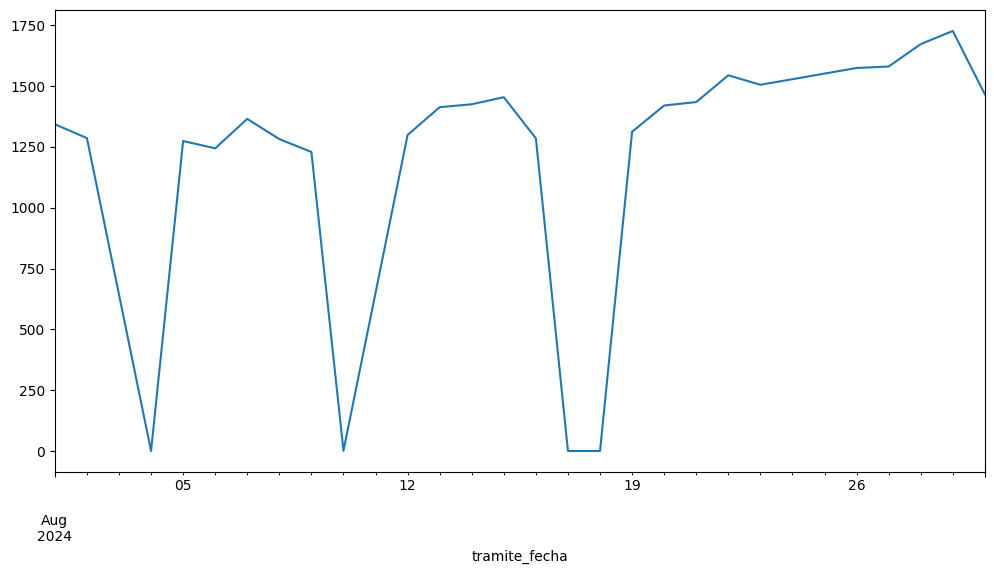

In [81]:
monthly_accidents.plot.line(figsize=(12,6))

Usemos ahora un dataset de ejemplo para seguir practicando con fechas

In [82]:

# Crear las listas de fechas y temperaturas
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = (25, 28, 26, 30)

# Crear el DataFrame utilizando las listas
data= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

data

,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        4 non-null      object
 1   Temperatura  4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 196.0+ bytes


In [84]:
# Convertir la columna 'Fecha' al tipo datetime
data['Fecha'] = pd.to_datetime(data['Fecha'])
data



,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes


**veamos otra forma de hacer lo mismo**

In [86]:
# Crear las listas de fechas y temperaturas
import numpy as np
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = np.array([25, 28, 26, 30])

# Crear el DataFrame utilizando las listas
data= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})
data

,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [87]:
# Convertir la columna 'Fecha' al tipo datetime

data['Fecha'] = data['Fecha'].astype('datetime64[ns]')
data

,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [88]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 196.0 bytes


In [89]:
data["dia"]=data["Fecha"].dt.strftime("%d")
data["mes"]=data["Fecha"].dt.strftime("%m")
data["año"]=data["Fecha"].dt.strftime("%Y")
data

,Fecha,Temperatura,dia,mes,año
0,2023-02-01,25,01,02,2023
1,2023-01-02,28,02,01,2023
2,2023-01-03,26,03,01,2023
3,2023-01-04,30,04,01,2023


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
 2   dia          4 non-null      object        
 3   mes          4 non-null      object        
 4   año          4 non-null      object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 292.0+ bytes


In [91]:
# Obtener la fecha en formato día mes año
data['Fecha'] = data['Fecha'].dt.strftime("%d/%m/%Y")

data

,Fecha,Temperatura,dia,mes,año
0,01/02/2023,25,01,02,2023
1,02/01/2023,28,02,01,2023
2,03/01/2023,26,03,01,2023
3,04/01/2023,30,04,01,2023


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha        4 non-null      object
 1   Temperatura  4 non-null      int64 
 2   dia          4 non-null      object
 3   mes          4 non-null      object
 4   año          4 non-null      object
dtypes: int64(1), object(4)
memory usage: 292.0+ bytes


**más ejemplos**

In [93]:

# Crear las listas de fechas y temperaturas
fechas = ['02/01/2023', '01/02/2023', '01/03/2023', '01/04/2023']
temperaturas = [25, 28, 26, 30]

# Crear el DataFrame utilizando las listas
data2= pd.DataFrame({'Fecha': fechas, 'Temperatura': temperaturas})

data2


,Fecha,Temperatura
0,02/01/2023,25
1,01/02/2023,28
2,01/03/2023,26
3,01/04/2023,30


In [94]:
# Convertir la columna 'Fecha' al tipo datetime
data2['Fecha'] = pd.to_datetime(data2['Fecha'])
data2

,Fecha,Temperatura
0,2023-02-01,25
1,2023-01-02,28
2,2023-01-03,26
3,2023-01-04,30


In [95]:
# Extraer el día de la columna 'Fecha'
data2['Dia'] = data2['Fecha'].dt.day
data2['Mes'] = data2['Fecha'].dt.month
data2['Year'] = data2['Fecha'].dt.year
data2

,Fecha,Temperatura,Dia,Mes,Year
0,2023-02-01,25,1,2,2023
1,2023-01-02,28,2,1,2023
2,2023-01-03,26,3,1,2023
3,2023-01-04,30,4,1,2023


In [96]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Fecha        4 non-null      datetime64[ns]
 1   Temperatura  4 non-null      int64         
 2   Dia          4 non-null      int32         
 3   Mes          4 non-null      int32         
 4   Year         4 non-null      int32         
dtypes: datetime64[ns](1), int32(3), int64(1)
memory usage: 244.0 bytes


La principal diferencia es que df['Fecha'].dt.day devuelve el día como un número entero, mientras que df['Fecha'].dt.strftime("%d") devuelve el día como una cadena de texto con dos dígitos (agregando un cero al inicio si es necesario para mantener el formato de dos dígitos)

In [97]:
agrupacion= data2.groupby(data2.Mes).size()
agrupacion

Mes
1    3
2    1
dtype: int64

<Axes: xlabel='Mes', ylabel='None'>

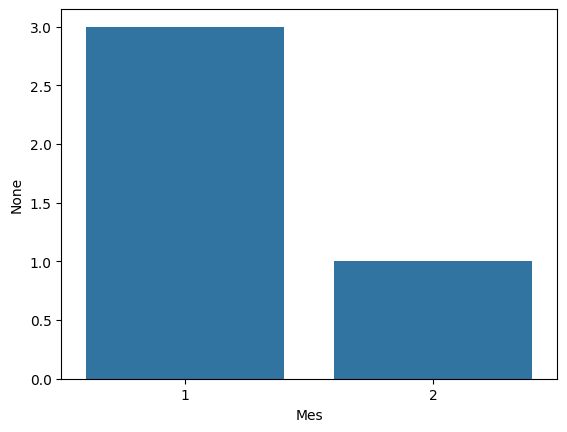

In [98]:
sns.barplot(x=agrupacion.index, y=agrupacion)

In [99]:
agrupadoV2= data2.groupby(data2['Fecha'].dt.to_period('M')).size()
agrupadoV2

Fecha
2023-01    3
2023-02    1
Freq: M, dtype: int64

# Marcas más robadas

In [100]:
df2['automotor_marca_descripcion'].value_counts()

#VOLSKWAGEN

automotor_marca_descripcion
VOLKSWAGEN    5754
FIAT          4128
TOYOTA        3668
FORD          3336
RENAULT       3291
              ... 
SMART            1
MINI             1
JETOUR           1
CHANGAN          1
IKA              1
Name: count, Length: 98, dtype: int64

In [101]:
top10= (df2['automotor_marca_descripcion'].value_counts())[:10]
top10

automotor_marca_descripcion
VOLKSWAGEN       5754
FIAT             4128
TOYOTA           3668
FORD             3336
RENAULT          3291
CHEVROLET        3172
PEUGEOT          2817
CITROEN          1154
MERCEDES BENZ     830
NISSAN            781
Name: count, dtype: int64

<Axes: title={'center': 'Marcas más robadas'}, xlabel='automotor_marca_descripcion', ylabel='Frecuencia'>

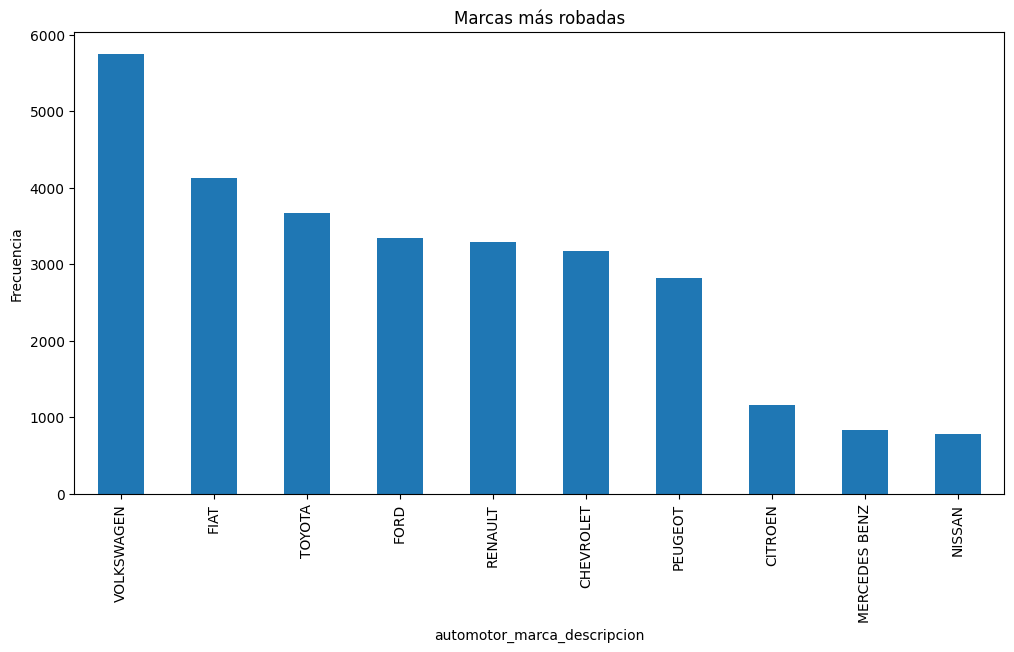

In [102]:
(df2['automotor_marca_descripcion'].value_counts()[:10]).plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Marcas más robadas')

#trazado integrada de pandas. Aquí se utiliza el método plot() de pandas con el argumento kind='bar' para crear un gráfico de barras

In [103]:
df2['automotor_modelo_descripcion'].value_counts()[0:50]

automotor_modelo_descripcion
CRONOS DRIVE 1.3 GSE BZ               1114
NUEVO POLO TRACK MSI MT                975
TAOS COMFORTLINE 250 TSI AT            391
208 ALLURE AM25                        375
RENEGADE SPORT 1.8L AT6 FWD            298
STRADA FREEDOM 1.3 CD                  251
YARIS XS 1.5 6M/T                      233
TRACKER 1.2T AT                        227
KANGOO EXPRESS 5A 1.6 SCE 114          221
CRONOS PRECISION 1.3 GSE CVT BZ        218
NIVUS 170 TSI MT                       217
FIORINO ENDURANCE 1.4 MT               214
NIVUS COMFORTLINE 200 TSI AT           210
GOL TREND 1.6                          206
HILUX 4X4 DC DX 2.4 TDI 6 MT           200
CRONOS STILE 1.3 GSE BZ                188
208 FELINE AT AM24.5                   174
KANGOO EXPRESS 2A 1.6 SCE 114          173
AMAROK TRENDLINE CD TDI MT 4X2         168
TRACKER 1.2T MT                        165
T-CROSS TRENDLINE 170TSI MT G1         154
RANGER DC XL 2.0L T 4X4 MT D           151
ONIX 1.0T MT LTZ         

<Axes: title={'center': 'Modelos más robados'}, xlabel='automotor_modelo_descripcion', ylabel='Frecuencia'>

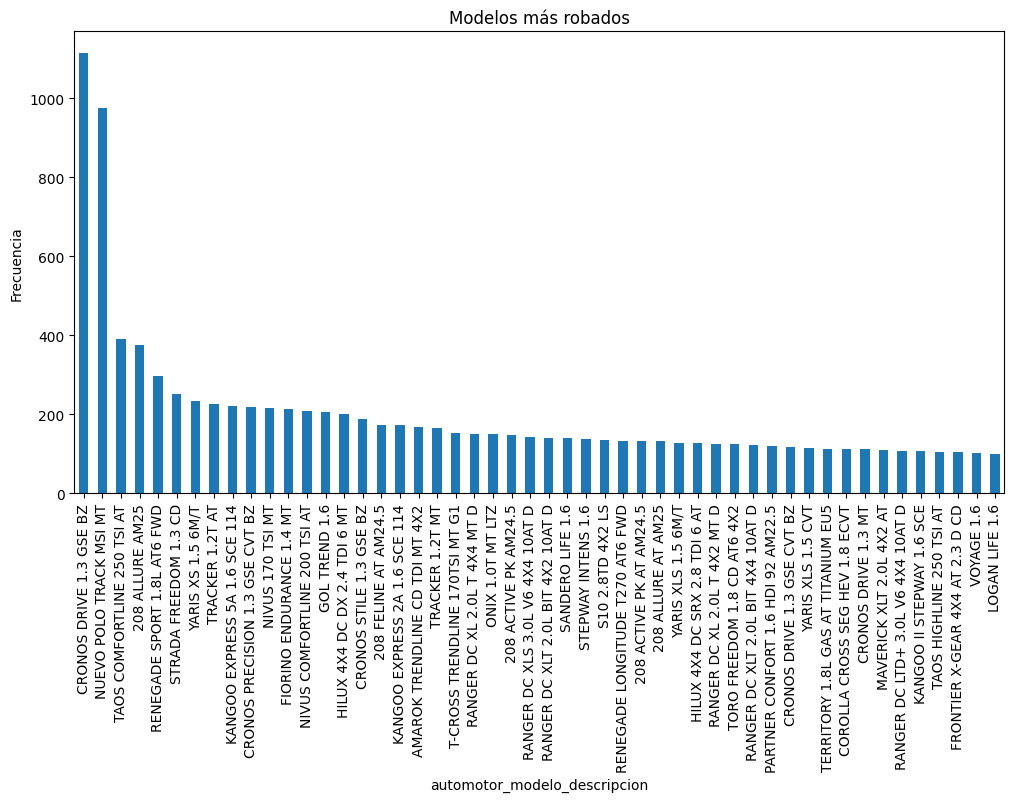

In [104]:
(df2['automotor_modelo_descripcion'].value_counts())[0:50].plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Modelos más robados')

#tomarlo como un mal ejemplo porque tenemos muchas barras

<Axes: title={'center': 'Robos por genero'}, xlabel='titular_genero', ylabel='Frecuencia'>

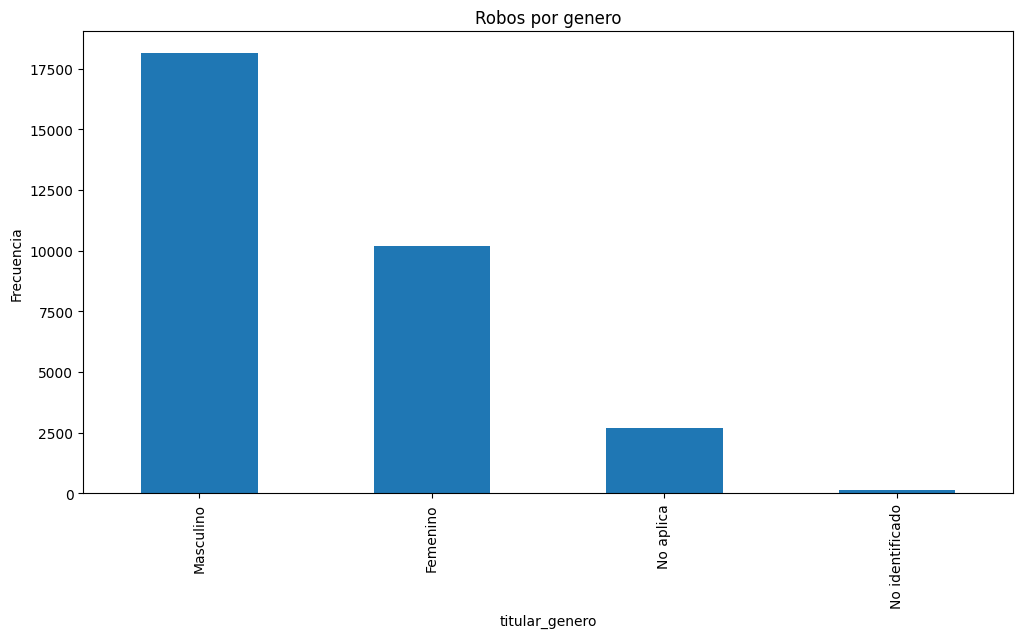

In [105]:
df2['titular_genero'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Robos por genero')

<Axes: title={'center': 'Procedencia del titular'}, xlabel='titular_pais_nacimiento', ylabel='Frecuencia'>

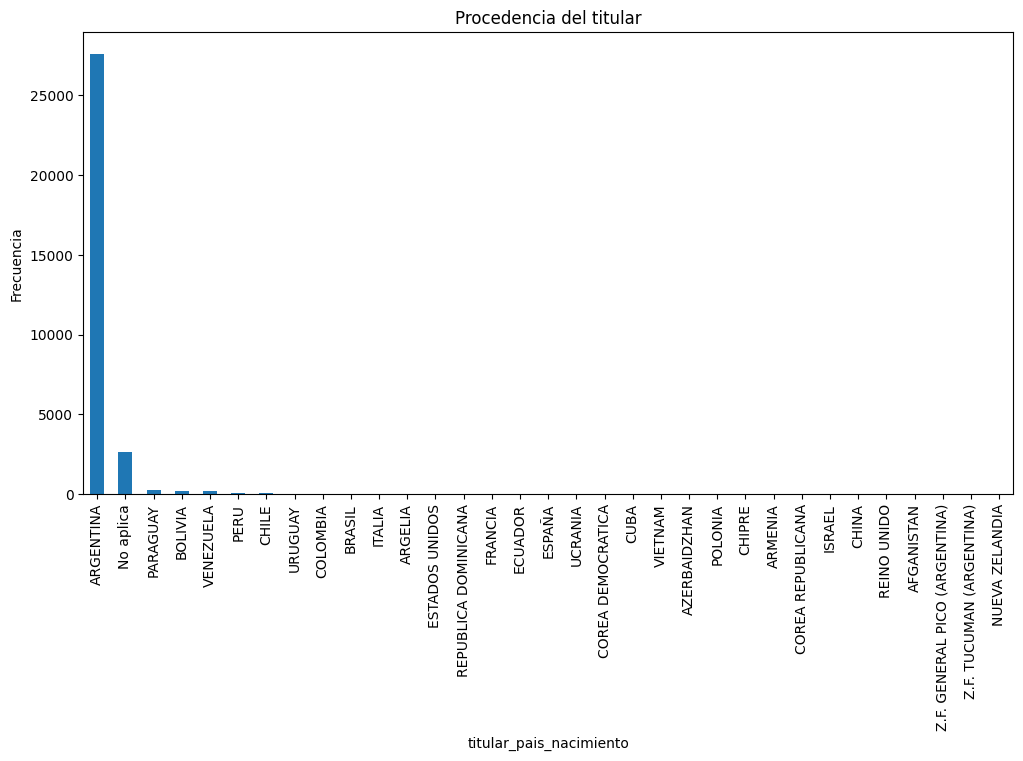

In [106]:
df2['titular_pais_nacimiento'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

<Axes: title={'center': 'Procedencia del titular'}, xlabel='titular_domicilio_provincia', ylabel='Frecuencia'>

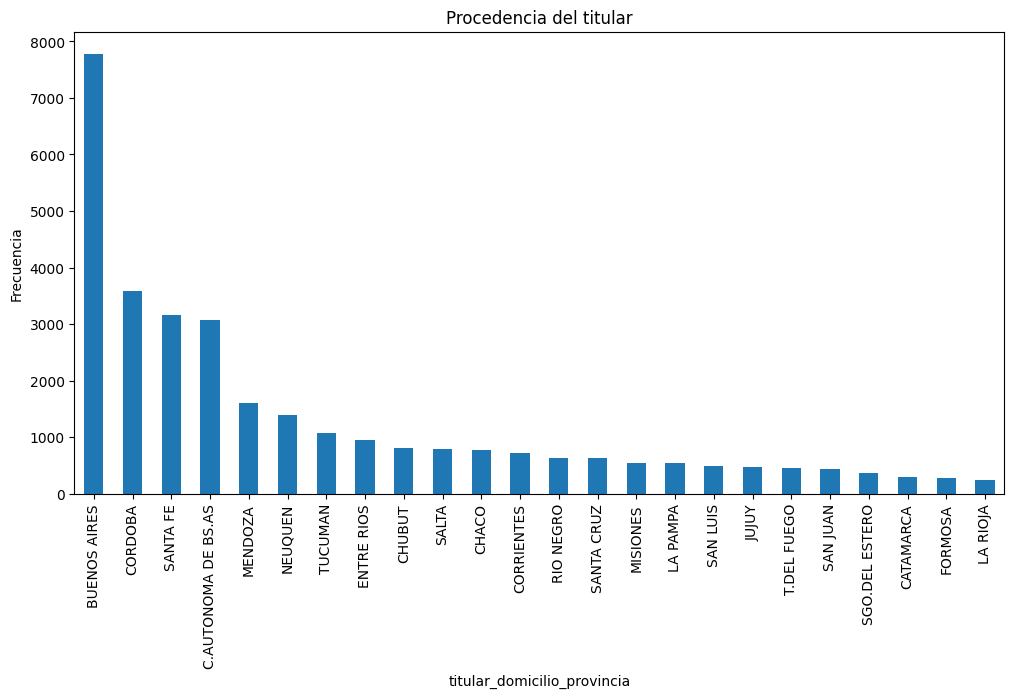

In [107]:
df2['titular_domicilio_provincia'].value_counts().plot(kind='bar', figsize=(12,6), ylabel='Frecuencia', title='Procedencia del titular')

# JSON

In [108]:
# De una URL
URL = 'http://raw.githubusercontent.com/BindiChen/machine-learning/master/data-analysis/027-pandas-convert-json/data/simple.json'
df = pd.read_json(URL)
df.head(10)

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [109]:
# Miremos este caso especial
df_json = pd.read_json('json-datasets/nested_json.json')
df_json # tenemos un JSON nested

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [110]:
import json

# Abrir el archivo JSON
with open('json-datasets/nested_json.json', 'r') as file:
    # Cargar el contenido del archivo en una variable
    data = json.load(file)

In [111]:
data

{'school_name': 'ABC primary school',
 'class': 'Year 1',
 'students': [{'id': 'A001',
   'name': 'Tom',
   'math': 60,
   'physics': 66,
   'chemistry': 61},
  {'id': 'A002', 'name': 'James', 'math': 89, 'physics': 76, 'chemistry': 51},
  {'id': 'A003', 'name': 'Jenny', 'math': 79, 'physics': 90, 'chemistry': 78}]}

In [112]:
# Abrir el JSON con pandas
df = pd.json_normalize(data, 'students', ['school_name', 'class'])
df

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


In [113]:
data

{'school_name': 'ABC primary school',
 'class': 'Year 1',
 'students': [{'id': 'A001',
   'name': 'Tom',
   'math': 60,
   'physics': 66,
   'chemistry': 61},
  {'id': 'A002', 'name': 'James', 'math': 89, 'physics': 76, 'chemistry': 51},
  {'id': 'A003', 'name': 'Jenny', 'math': 79, 'physics': 90, 'chemistry': 78}]}

#Tan solo para practicar hagamos el camino más complicado:

In [114]:
#Creamos las listas para introducir adentro los datos de los diccionarios id 	name 	math 	physics 	chemistry
id=[]
name=[]
math=[]
physics=[]
chemistry=[]

for i in data["students"]:
    id.append(i["id"])
    name.append(i["name"])
    math.append(i["math"])
    physics.append(i["physics"])
    chemistry.append(i["chemistry"])

df_practica= pd.DataFrame({"id":id, "name":name, "math":math, "physics": physics, "chemistry": chemistry})
df_practica

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [115]:
df_json

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [116]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final

,id,name,math,physics,chemistry,school_name,class,students
0,A001,Tom,60,66,61,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,A002,James,89,76,51,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,A003,Jenny,79,90,78,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [117]:
df_final.drop("students", axis=1, inplace=True)
df_final

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1


In [118]:
df_practica


,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [119]:
df_json

,school_name,class,students
0,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


In [120]:
# cambiemos el index
df_practica.index=[4,5,6]
df_practica

,id,name,math,physics,chemistry
4,A001,Tom,60,66,61
5,A002,James,89,76,51
6,A003,Jenny,79,90,78


In [121]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final

,id,name,math,physics,chemistry,school_name,class,students
4,A001,Tom,60.0,66.0,61.0,NaN,NaN,NaN
5,A002,James,89.0,76.0,51.0,NaN,NaN,NaN
6,A003,Jenny,79.0,90.0,78.0,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A001', 'name': 'Tom', 'math': 60, 'phy..."
1,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A002', 'name': 'James', 'math': 89, 'p..."
2,NaN,NaN,NaN,NaN,NaN,ABC primary school,Year 1,"{'id': 'A003', 'name': 'Jenny', 'math': 79, 'p..."


para evitar eso hagamos un reset_index

In [122]:
df_practica= df_practica.reset_index(drop=True)
df_practica

,id,name,math,physics,chemistry
0,A001,Tom,60,66,61
1,A002,James,89,76,51
2,A003,Jenny,79,90,78


In [123]:
df_final=pd.concat([df_practica, df_json], axis=1)
df_final.drop("students", axis=1, inplace=True)
df_final

# ahora si quedo igual que antes

,id,name,math,physics,chemistry,school_name,class
0,A001,Tom,60,66,61,ABC primary school,Year 1
1,A002,James,89,76,51,ABC primary school,Year 1
2,A003,Jenny,79,90,78,ABC primary school,Year 1
